Import modules

In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load iris dataset

In [34]:
iris = datasets.load_iris()

In [35]:
iris_X = iris.data
y = iris.target

Import decomposition modules

In [36]:
from sklearn import decomposition

Instantiate a default PCA object:

In [37]:
pca = decomposition.PCA()

In [38]:
pca

PCA()

transform the data by calling the fit_transform method, with iris_X as the argument:

In [39]:
iris_pca = pca.fit_transform(iris_X)

In [40]:
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [41]:
iris_X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [42]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [43]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [44]:
pca = decomposition.PCA(n_components=2)

iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [45]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [46]:
pca.explained_variance_ratio_.sum()

0.977685206318795

plot the first two dimensions of the iris dataset with before-after pictures of the PCA transformation:

Text(0.5, 1.0, 'After PCA')

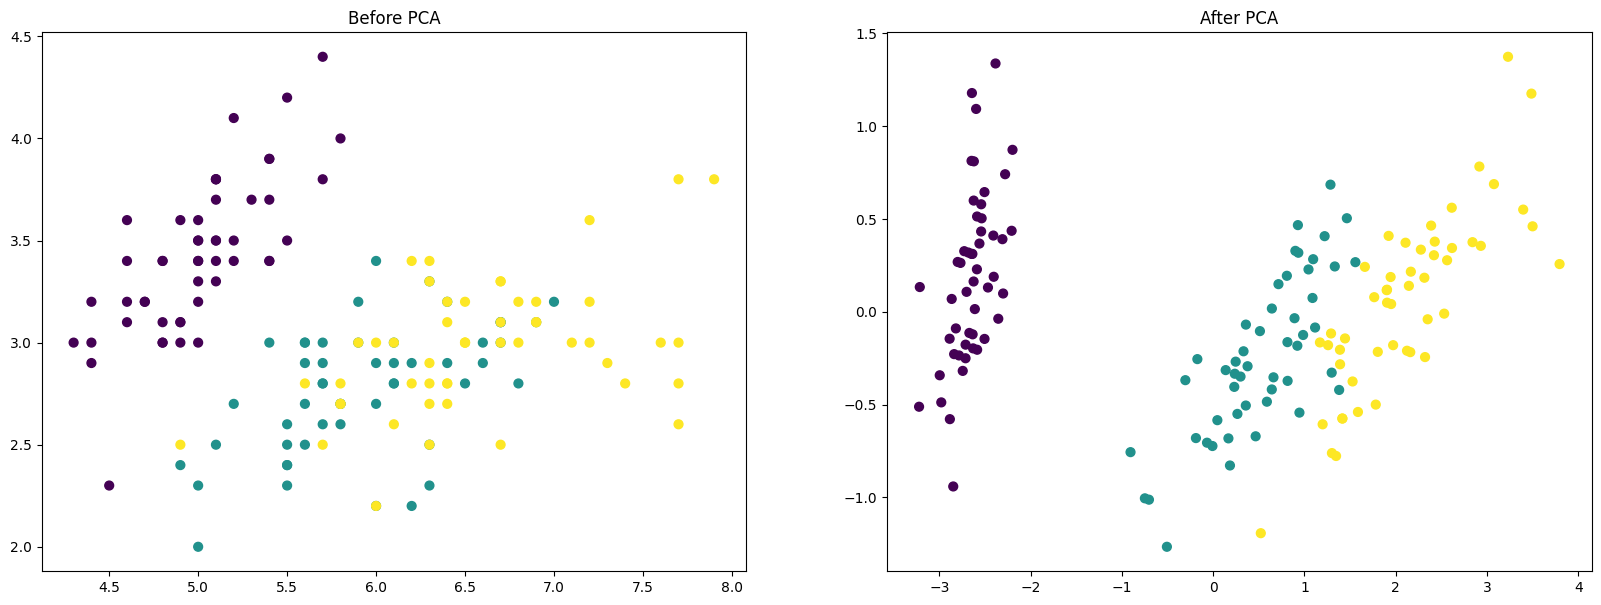

In [47]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0], iris_X[:,1], c=y, s=40)
ax.set_title('Before PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y, s=40)
ax2.set_title('After PCA')

PCA is scaled beforehand

In [48]:
from sklearn import preprocessing

In [49]:
iris_X_scaled = preprocessing.scale(iris_X)
pca = decomposition.PCA(n_components=2)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

Plot it to a graph

Text(0.5, 1.0, 'Scaling followed by PCA')

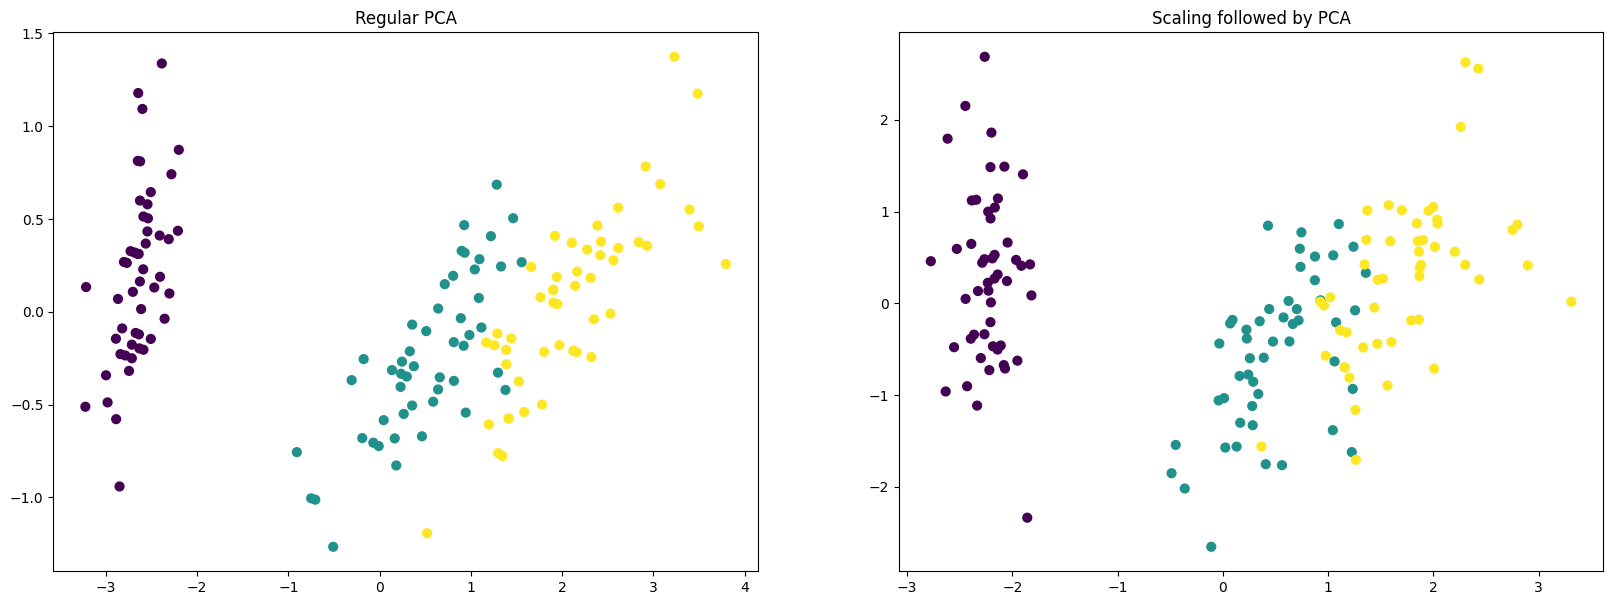

In [50]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y, s=40)
ax.set_title('Regular PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0], iris_X_scaled[:,1], c=y, s=40)
ax2.set_title('Scaling followed by PCA')

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
pipe = Pipeline([('scaler', StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
iris_X_scaled = pipe.fit_transform(iris_X)